# Neural Network from Scratch

**TODO:**
- 
- L2 Regularization
- Dropout regularization
- Early stopping
- Classity MNIST
- Encoder and decoder

In [833]:
# Import libraries.
import numpy as np
import pandas as pd
from abc import ABC, abstractmethod
import matplotlib.pyplot as plt

In [834]:
dataset = pd.read_csv('Concrete_dataset.csv')

**Attirbutes/Features:**
- Cement (kg_in_m3)
- Blast Furnace Slag (kg_in_m3)
- Fly Ash (kg_in_m3)
- Water (kg_in_m3)
- Superplasticizer (kg_in_m3)
- Coarse Aggregate (kg_in_m3)
- Fine Aggregate (kg_in_m3)
- Age (day)

**Labels/Targets:**
- Concrete compressive strength (Mpa)

In [835]:
dataset.head()

,Cement (kg_in_m3),Blast Furnace Slag (kg_in_m3),Fly Ash (kg_in_m3),Water (kg_in_m3),Superplasticizer (kg_in_m3),Coarse Aggregate (kg_in_m3),Fine Aggregate (kg_in_m3),Age (day),Concrete compressive strength (Mpa)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Note that small amount of data entries. 1030 might not be enough!

In [836]:
dataset.describe()

,Cement (kg_in_m3),Blast Furnace Slag (kg_in_m3),Fly Ash (kg_in_m3),Water (kg_in_m3),Superplasticizer (kg_in_m3),Coarse Aggregate (kg_in_m3),Fine Aggregate (kg_in_m3),Age (day),Concrete compressive strength (Mpa)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


# Dataset Management Class

In [837]:
class DatasetManagement:
    @staticmethod
    # This method is used to split the dataset into train, test, and validation sets.
    # It also returns the data transposed to simplyfy the matrix operations.
    def split_into_train_test_valdiation(dataset, test_size, validation_size, random_state):
        # Check input.
        if test_size < 0 or test_size > 1:
            raise ValueError('Test size must be between 0 and 1.')
        if validation_size < 0 or validation_size > 1:
            raise ValueError('Validation size must be between 0 and 1.')
        if test_size + validation_size >= 1:
            raise ValueError('Sum of test size and validation size must be less than 1.')
        # Shuffle the dataset.
        dataset = dataset.sample(frac=1, random_state=random_state)
        # Create train, test, and validation sets.
        train_stop_index = int(len(dataset) * (1 - test_size - validation_size))
        test_stop_index = int(len(dataset) * (1 - validation_size))
        train = dataset[:train_stop_index]
        test = dataset[train_stop_index:test_stop_index]
        validation = dataset[test_stop_index:]
        # Return the sets in a dictionary.
        return [
            train.iloc[:, :-1].values.T,
            train.iloc[:, -1].values,
            test.iloc[:, :-1].values.T,
            test.iloc[:, -1].values,
            validation.iloc[:, :-1].values.T,
            validation.iloc[:, -1].values
        ]
    @staticmethod
    def normalize(dataset):
        # Normalize the dataset.
        mean = np.mean(dataset, axis=0)
        std = np.std(dataset, axis=0)
        return (dataset - mean) / std

In [838]:
# Noramlize the dataset.
dataset.iloc[:, :-1] = DatasetManagement.normalize(dataset.iloc[:, :-1])
# Split up the data into train, test, and validation sets.
data = DatasetManagement.split_into_train_test_valdiation(dataset, 0.1, 0.1, 42)
[train_X, train_y, test_X, test_y, validation_X, validation_y] = data

/tmp/ipykernel_973/3568508677.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0      -0.279733
1      -0.279733
2       3.553066
3       5.057677
4       4.978487
          ...   
1025   -0.279733
1026   -0.279733
1027   -0.279733
1028   -0.279733
1029   -0.279733
Name: Age (day), Length: 1030, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dataset.iloc[:, :-1] = DatasetManagement.normalize(dataset.iloc[:, :-1])


# Math

This seciton should hold class with static methods for math functions that are reued.

In [839]:
class Math:

    # ReLU activation function.
    @staticmethod
    def ReLU(x):
        return np.maximum(0, x)
    @staticmethod
    def dReLU(x):
        return np.where(x <= 0, 0, 1)
    
    # Mean Squared Error loss function.
    @staticmethod
    def MSE(y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    def dMSE(y_pred, y_true):
        return 2*(y_pred - y_true) / y_true.size # .size and len() will yield the same result here.
    
    # L2 regularization.
    def l2(weights, lam):
        if lam <= 0:
            raise ValueError('Lambda must be greater than 0.')
        return lam * np.sum(weights ** 2)

# Neuron

In [840]:
class Neuron:
    
    # Constructor.
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    # Calculation method.
    # This is where we apply the weights and bias to the input data.
    #
    # Math:
    # y = w^T*x + b
    #
    # Examlpe inputs:
    # [
    #   [1,2,3,4,5,6,7,8],
    #   [11,22,33,44,55,66,77,88]
    # ]
    # (2 columns and 8 rows)
    #
    # Output:
    # [36, 396]
    # (1 column and 2 rows)
    def calculate(self, inputs):
        return np.dot(self.weights, inputs) + self.bias
    
    # Adjust weights and bias.
    # This method is called during the backward propagation step.
    def adjust(self, weights_gradient, bias_gradient, learning_rate):
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * bias_gradient

# Layers

- The shape (4, 4) means 4 rows and 4 columns
- The shape (2, 4) means 2 rows and 4 columns
- The shape (1, 2) means 1 row and 2 columns

### Pre-Activation Function & Activation Function
The pre-activation function is handled inside each neuron, and the activation function is applied in the layer.

**Notes:**
- NumPy dotproduct does tranposing for us.

In [841]:
class LayerAbstract(ABC):
    
    # Set name.
    # Used for setting name based on the type of layer.
    @abstractmethod
    def set_name(self, index):
        pass

    # Forward pass.
    @abstractmethod
    def forward(self, input):
        pass

In [842]:
class Layer:
    # Constructor.
    def __init__(self):
        self.prev_layer             = None
        self.next_layer             = None
        self.num_of_inputs          = None
        self.name                   = None

In [843]:
class InputLayer(LayerAbstract, Layer):

    # Constructor.
    # Input shape should be an integer.
    def __init__(self, input_size):

        self.x = None

        # Fix the input size.
        if input_size <= 0:
            raise ValueError("Input size should be a positive integer.")
        self.input_size = input_size

        super().__init__()
    
    # Set name.
    def set_name(self, index):
        self.name = f'Input Layer {str(index)} with shape ({self.input_size})'

    # Forward pass.
    # No math is done here as this is the input layer.
    def forward(self, x):
        self.x = x
        return self.next_layer.forward(x)

In [844]:
# Notes:
# - The inital weights and bias can be generated in better ways that can simplyfy the convergence of the model.
class DenseLayer(LayerAbstract, Layer):

    # Constructor.
    def __init__(self, num_of_neurons, activation_function, regularization_function):
        
        # Fix the output size.
        if num_of_neurons is not None and num_of_neurons <= 0:
            raise ValueError("Output size should be a positive integer.")
        
        # Set variables.
        self.num_of_neurons                     = num_of_neurons
        self.neurons                            = []
        self.activation_function                = None
        self.derivative_activation_function     = None
        self.a                                  = None
        self.z                                  = None
        self.regularization_function            = None

        # Set activation function.
        self.__set_actionvation_function(activation_function)

        # Set regularization function.
        self.__set_regularization_function(regularization_function)

        super().__init__()

    # Set activation function.
    def __set_actionvation_function(self, activation_function):
        activation_function_lower_case = activation_function.lower()
        match activation_function_lower_case:
            case 'relu':
                self.activation_function = Math.ReLU
                self.derivative_activation_function = Math.dReLU
            case _:
                raise ValueError("Activation function not supported.")
            
    # Set regularization function.
    def __set_regularization_function(self, regularization_function):
        regularization_function_lower_case = regularization_function.lower()
        match regularization_function_lower_case:
            case 'l2':
                self.regularization_function = Math.L2
            case _:
                raise ValueError("Regularization function not supported.")
    
    # Add neurons.
    def add_neurons(self, num_of_inputs):
        self.num_of_inputs = num_of_inputs # Store for later use.
        for i in range(self.num_of_neurons):
            # Generate random initial weights using He initialization.
            weights = np.random.randn(num_of_inputs) * np.sqrt(2 / num_of_inputs) # He initialization.
            bias = np.random.uniform(-1, 1)
            self.neurons.append(Neuron(weights, bias))
    
    # Set name.
    def set_name(self, index):
        self.name = f'Dense Layer {str(index)} with shape ({self.num_of_neurons}, {self.num_of_inputs})'

    # Forward pass.
    # Apply formula:
    # z = w^T*x + b (calculated in each neuron)
    # a = g(y)
    # Examlpe inputs:
    # [
    #   [1,2,3,4,5,6,7,8],
    #   [11,22,33,44,55,66,77,88]
    # ]
    # (2 columns and 8 rows)
    #
    # Troughout the forward pass,
    # the output of each neuron is stored in a list.
    def forward(self, inputs):
        # Creata a list to store the output of each neuron.
        # The output would be formated as:
        # [
        #   [input_1, input_2],
        #   [input_1, input_2],
        #   [input_1, input_2],
        #   ...  
        # ]
        # One column per input and one row per neuron.
        z = []
        for neuron in self.neurons:
            z.append(neuron.calculate(inputs))
        # Store the output for back propagation.
        # We must transpose the output to match the input shape.
        # That is:
        # [
        #   [input_1, input_1, input_1, ...],
        #   [input_2, input_2, input_2, ...]
        # ]
        self.z = np.array(z).squeeze()
        self.a = np.array(self.activation_function(self.z))
        # Pass the output to the next layer (if any).
        if self.next_layer is not None:
            return self.next_layer.forward(self.a)
        else:
            return self.a
        
    def get_weights(self):
        if self.num_of_neurons == 1:
            return np.array([self.neurons[0].weights])
        else:
            return np.array([neuron.weights for neuron in self.neurons])
        
    def get_bias(self):
        return np.array([neuron.bias for neuron in self.neurons])
        
    # Backward pass.
    # This is the learning stage.
    #
    # First gradients input (batch size of 32):
    # [1,2,3,4,...,32]
    def backward(self, gradients, learning_rate):
        
        amount_of_entries = gradients.shape[0]
        
        # Calculate the gradients.
        if isinstance(self.prev_layer, InputLayer): # As the instance layer holds it's input in a different variable...
            input = self.prev_layer.x
        else:
            input = self.prev_layer.a
        dZdW = gradients.dot(input.T) / amount_of_entries
        dZdB = np.sum(gradients) / amount_of_entries
        
        dZdW = np.clip(dZdW, -1, 1)
        dZdB = np.clip(dZdB, -1, 1)
        
        # Send the graidients to the neurons.
        for i in range (self.num_of_neurons):
            self.neurons[i].adjust(dZdW[i], dZdB, learning_rate)
            
        # Pass the gradients to the previous layer (if any).
        if not isinstance(self.prev_layer, InputLayer):
            if self.num_of_neurons == 1:
                dZdA = self.get_weights().T * gradients
            else:
                dZdA = self.get_weights().T.dot(gradients)
            dAdZ = self.prev_layer.derivative_activation_function(self.prev_layer.z)
            # Sum up the result of the dot product as we want to keep the gradients as a single value.
            new_gradient = dZdA * dAdZ
            self.prev_layer.backward(new_gradient, learning_rate)

# Model

In [845]:
class Model:
    
    # Constructor.
    def __init__(self, layers_to_add):
        # Define variables to be used.
        self.head_layer                 = None
        self.tail_layer                 = None
        self.num_of_layers              = 0
        self.cost_function              = None
        self.derivative_cost_function   = None
        self.train_loss_history         = []
        self.val_loss_history           = []

        # Add layers.
        for layer in layers_to_add:
            self.__add_layer(layer)
        # Print layers.
        self.print_layers()
        # Perform checks.
        self.__check_stucture()

    # Set cost function.
    def set_cost_function(self, cost_function):
        cost_function_lower_case = cost_function.lower()
        match cost_function_lower_case:
            case 'mse':
                self.cost_function = Math.MSE
                self.derivative_cost_function = Math.dMSE
            case _:
                raise ValueError("Cost function not supported")

    # Check for required layers.
    # The model must have a input and output layer.
    def __check_stucture(self):
        if not isinstance(self.head_layer, InputLayer):
            raise ValueError("Model must have an input layer.")
        if not isinstance(self.tail_layer, DenseLayer):
            raise ValueError("Model must have an output layer.")
        print('Model structure is correct.')

    # Add layers.
    def __add_layer(self, layer_to_add):
        # Check the first layer.
        if self.head_layer is None and not isinstance(layer_to_add, InputLayer):
            raise ValueError("First layer should be InputLayer.")

        # Point previous layer to the new layer.
        if self.tail_layer is not None:
            self.tail_layer.next_layer = layer_to_add
            layer_to_add.prev_layer = self.tail_layer

        # Set head layer.
        if self.head_layer is None:
            self.head_layer = layer_to_add

        # Set tail layer.
        self.tail_layer = layer_to_add

        # Add neurons.
        # We have to check the tail layer type ot know how to select the
        # number of neurons we need to add.
        if not isinstance(layer_to_add, InputLayer): # Then we know that the layer has neurons.
            prev_layer = layer_to_add.prev_layer
            num_of_inputs = None
            if isinstance(prev_layer, InputLayer):
                num_of_inputs = prev_layer.input_size
            else:
                num_of_inputs = prev_layer.num_of_neurons
            layer_to_add.add_neurons(num_of_inputs)
        
        # Name the layer.
        layer_to_add.set_name(self.num_of_layers)
        self.num_of_layers += 1

    # Print layers.
    def print_layers(self):
        layer = self.head_layer
        while layer is not None:
            print(layer.name)
            layer = layer.next_layer

    # Predict trough forward propegation.
    # Each layer has it's own forward function,
    # there the math is done.
    def predict(self, X_set):
        # Make sure that the inputs are in the correct format.
        X_set = np.array(X_set)
        # Convert single input to 2d array.
        if (len(X_set.shape) == 1):
            X_set = np.array([X_set])
        # Check if the input size is correct.
        if len(X_set.shape) != 2 or X_set.shape[0] != self.head_layer.input_size:
            raise ValueError("Input size is not correct.")
        # Prepare results.
        predictions = self.head_layer.forward(X_set)
        return np.array(predictions).flatten()
    
    # Test function.
    # Return the result of the cost function.
    # x is the attributes and y is the labels.
    # Note that this methods supports both arrays and single values.
    def test(self, inputs, y_true):
        y_pred = self.predict(inputs)
        return self.cost_function(y_pred, y_true)
    
    # Backward propagation function.
    def __backward(self, y_pred, y_true, learning_rate):
        # Calculate the gradient.
        # Note that we calculate dCdA and not dZdA as we're currenctly on the last layer.
        dCdA = self.derivative_cost_function(y_pred, y_true)
        dAdZ = self.tail_layer.derivative_activation_function(self.tail_layer.z)
        gradients = (dCdA * dAdZ.T).T
        self.tail_layer.backward(gradients, learning_rate)
    
    # Fiting function used for training the model.
    # It's goal is to call the back propegation function
    # a certain amount of times.
    def fit(self, train_X, train_y, validation_X, validation_y, learning_rate, epochs, batch_size):
        for epoch in range(epochs):
            # Note that this method results in one batch being smaller than the rest.
            for i in range(0, len(train_X), batch_size):
                # Get input and output.
                X_set = train_X[:, i:i+batch_size]
                y_true = train_y[i:i+batch_size]
                # Forward pass.
                y_pred = self.predict(X_set)
                # Backward pass.
                self.__backward(y_pred, y_true, learning_rate)
            self.train_loss_history.append(self.test(train_X, train_y))
            self.val_loss_history.append(self.test(validation_X, validation_y))
            print(f'Epoch: {epoch + 1}, Train: {self.train_loss_history[-1]}, Loss: {self.val_loss_history[-1]}') # Here we should use validation set!

In [846]:
# Define model.
model = Model([
    InputLayer(input_size=8),
    DenseLayer(num_of_neurons=8, activation_function="ReLU"),
    DenseLayer(num_of_neurons=4, activation_function="ReLU"),
    DenseLayer(num_of_neurons=2, activation_function="ReLU"),
    DenseLayer(num_of_neurons=1, activation_function="ReLU"),
])

Input Layer 0 with shape (8)
Dense Layer 1 with shape (8, 8)
Dense Layer 2 with shape (4, 8)
Dense Layer 3 with shape (2, 4)
Dense Layer 4 with shape (1, 2)
Model structure is correct.


In [847]:
# Set cost function.
model.set_cost_function('MSE')

In [848]:
# Test model before training.
print(f'Loss before training: {model.test(validation_X, validation_y)}')

Loss before training: 1509.295397485432


In [849]:
model.fit(train_X, train_y, validation_X, validation_y, 0.1, 50, 32)
model.fit(train_X, train_y, validation_X, validation_y, 0.01, 50, 32)
model.fit(train_X, train_y, validation_X, validation_y, 0.001, 50, 32)

Epoch: 1, Train: 1505.907409202589, Loss: 1482.591411473465
Epoch: 2, Train: 1451.4560811703095, Loss: 1433.7028935281874
Epoch: 3, Train: 1328.7370955464514, Loss: 1312.8633735390679
Epoch: 4, Train: 1126.0251049140845, Loss: 1124.9900619431448
Epoch: 5, Train: 844.980635035854, Loss: 865.1293650696497
Epoch: 6, Train: 550.0663346350177, Loss: 571.8271627903526
Epoch: 7, Train: 386.981854194928, Loss: 355.6352497186094
Epoch: 8, Train: 483.3717491917087, Loss: 495.0717036062764
Epoch: 9, Train: 339.9574243818623, Loss: 291.68681639599225
Epoch: 10, Train: 415.39076976775124, Loss: 418.42928911270496
Epoch: 11, Train: 291.9372737684104, Loss: 232.3388883906758
Epoch: 12, Train: 377.1173389130666, Loss: 372.11257526055937
Epoch: 13, Train: 271.3152945552214, Loss: 206.70230789447388
Epoch: 14, Train: 340.9715324959298, Loss: 329.43672823300756
Epoch: 15, Train: 264.0150603412878, Loss: 205.81070471354252
Epoch: 16, Train: 323.12150788562724, Loss: 309.354798187292
Epoch: 17, Train: 275.

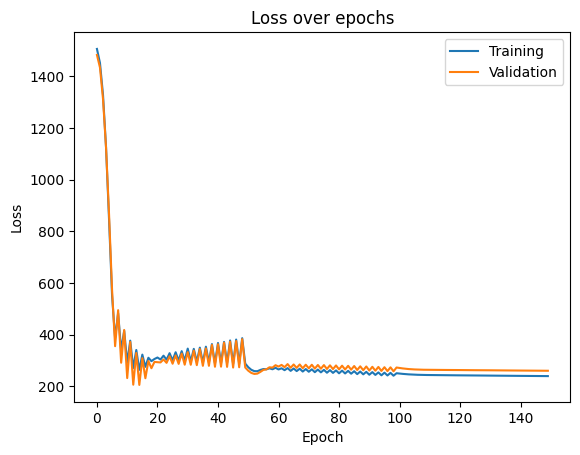

In [850]:
# Plot data from training.
plt.plot(model.train_loss_history, label='Training')
plt.plot(model.val_loss_history, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.legend()